###**How is conducting a classification analysis on customer churn essential for businesses?**
Conducting regression analysis on customer churn in the telecom industry is important for several key reasons:

1. **Predictive Insights:** Regression analysis helps in predicting which customers are likely to churn. By analyzing customer data and identifying patterns that lead to churn, telecom companies can proactively address at-risk customers. This predictive capability is crucial for formulating strategies to enhance customer retention.

2. **Customer Lifetime Value Maximization:** Regression analysis helps in understanding and increasing the lifetime value of customers. By preventing churn, telecom companies ensure a longer and more profitable relationship with their customers.

3. **Market Competitiveness:** In the highly competitive telecom industry, reducing churn rates can significantly impact a company's market share and profitability. Regression analysis provides the data-driven insight needed to stay competitive in terms of pricing, service quality, and customer engagement strategies.

4. **Policy and Strategic Planning:** The results from such analyses are essential for higher-level strategic planning and policy-making. They guide decisions on long-term investments, marketing campaigns, customer service enhancements, and overall business strategy.


### **Data Information**

This [dataset](https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset) is randomly collected from an Iranian telecom company database over a period of 12 months.

It's important to note that all attributes, with the exception of the 'churn' attribute, represent aggregated data compiled over the first nine months of the observed period. The 'churn' labels, however, reflect the status of the customers at the conclusion of the full 12-month period. This three-month difference between the data aggregation period and the churn status determination is the designated planning gap, providing insights into customer retention and turnover within this timeframe.

### Base on the data We are looking to answer the following questions:

1. **How does customer value correlate with churn?**  
   Investigate whether higher customer value is associated with a lower likelihood of churn. This analysis could reveal if more valuable customers are more loyal or if they have different expectations leading to churn.

2. **What is the relationship between subscription length and churn?**  
   Examine if longer subscription lengths are indicative of lower churn rates. This can help in understanding if tenure is a significant factor in customer loyalty.

3. **Does the frequency of service usage (calls, SMS) impact churn rates?**  
   Analyze how the frequency of calls and SMS correlates with churn. This could indicate whether higher or lower usage of services influences the decision to stay with or leave the service provider.

4. **Are there differences in churn rates among different age groups and tariff plans?**  
   Investigate if certain age groups or users of specific tariff plans (Pay-as-you-go vs Contractual) are more prone to churn. This might help in tailoring services to reduce churn in specific demographic segments.

5. **How do call failures and complaints relate to churn?**  
   Study the impact of call failures and the presence of complaints on the likelihood of churn. This could reveal the importance of service quality in customer retention strategies.


###1. DataFrame Creation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

file = '/content/drive/My Drive/Colab Notebooks/CSC233/StudentWork/Final/LUIS_Final Project/Customer Churn.csv'
df = pd.read_csv(file)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### We need to know some the following things:
- How many instances are there?
- How many features?
- check the data type


In [ ]:
r,c = df.shape

print('Rows: {} \nColumns: {}'.format(r,c))

Rows: 3150 
Columns: 14


In [ ]:
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

Our data sample comprises a total of 3,150 records, each characterized by 14 features. These features are:

1. Call Failures: The number of call failures experienced.
2. Complaints: A binary attribute (0: No complaint, 1: Complaint).
3. Subscription Length: The total number of months subscribed.
4. Charge Amount: An ordinal attribute (0: Lowest amount, 9: Highest amount).
5. Seconds of Use: The total number of seconds spent on calls.
6. Frequency of Use: The total number of calls made.
7. Frequency of SMS: The total number of text messages sent.
8. Distinct Called Numbers: The total number of different phone numbers called.
9. Age Group: An ordinal attribute (1: Younger age group, 5: Older age group).
1. Tariff Plan: A binary attribute (1: Pay-as-you-go, 2: Contractual).
11. Status: A binary attribute (1: Active, 2: Non-active).
12. Churn: A binary attribute indicating customer attrition (1: Churn, 0: Non-churn) - This is the class label.
13. Customer Value: A calculated metric representing the customer's value.



After revealing all the data, we should ask what are we looking to answer, and this is our question: Questions:  

1. **How does customer value correlate with churn?**  
   I will investigate whether higher customer value is associated with a lower likelihood of churn. This analysis could reveal if more valuable customers are more loyal or if they have different expectations leading to churn.

2. **What is the relationship between subscription length and churn?**  
   I will examine if longer subscription lengths are indicative of lower churn rates. This can help in understanding if tenure is a significant factor in customer loyalty.

3. **Does the frequency of service usage (calls, SMS) impact churn rates?**  
   Analyzeing how the frequency of calls and SMS correlates with churn. This could indicate whether higher or lower usage of services influences the decision to stay with or leave the service provider.

4. **Are there differences in churn rates among different age groups and tariff plans?**  
   See if certain age groups or users of specific tariff plans are more prone to churn. This might help in tailoring services to reduce churn in specific demographic segments.

5. **How do call failures and complaints relate to churn?**  
   Study the impact of call failures and the presence of complaints on the likelihood of churn. This could reveal the importance of service quality in customer retention strategies.


###2.Data Cleaning and Preprocessing


- **Missing Values**: Identify and handle missing data.
 - This is to avoid any incomplete understanding of the underlying patterns and relationships. This can lead to incorrect inferences or predictions that don't accurately represent the real-world scenario.

In [ ]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

<Axes: >

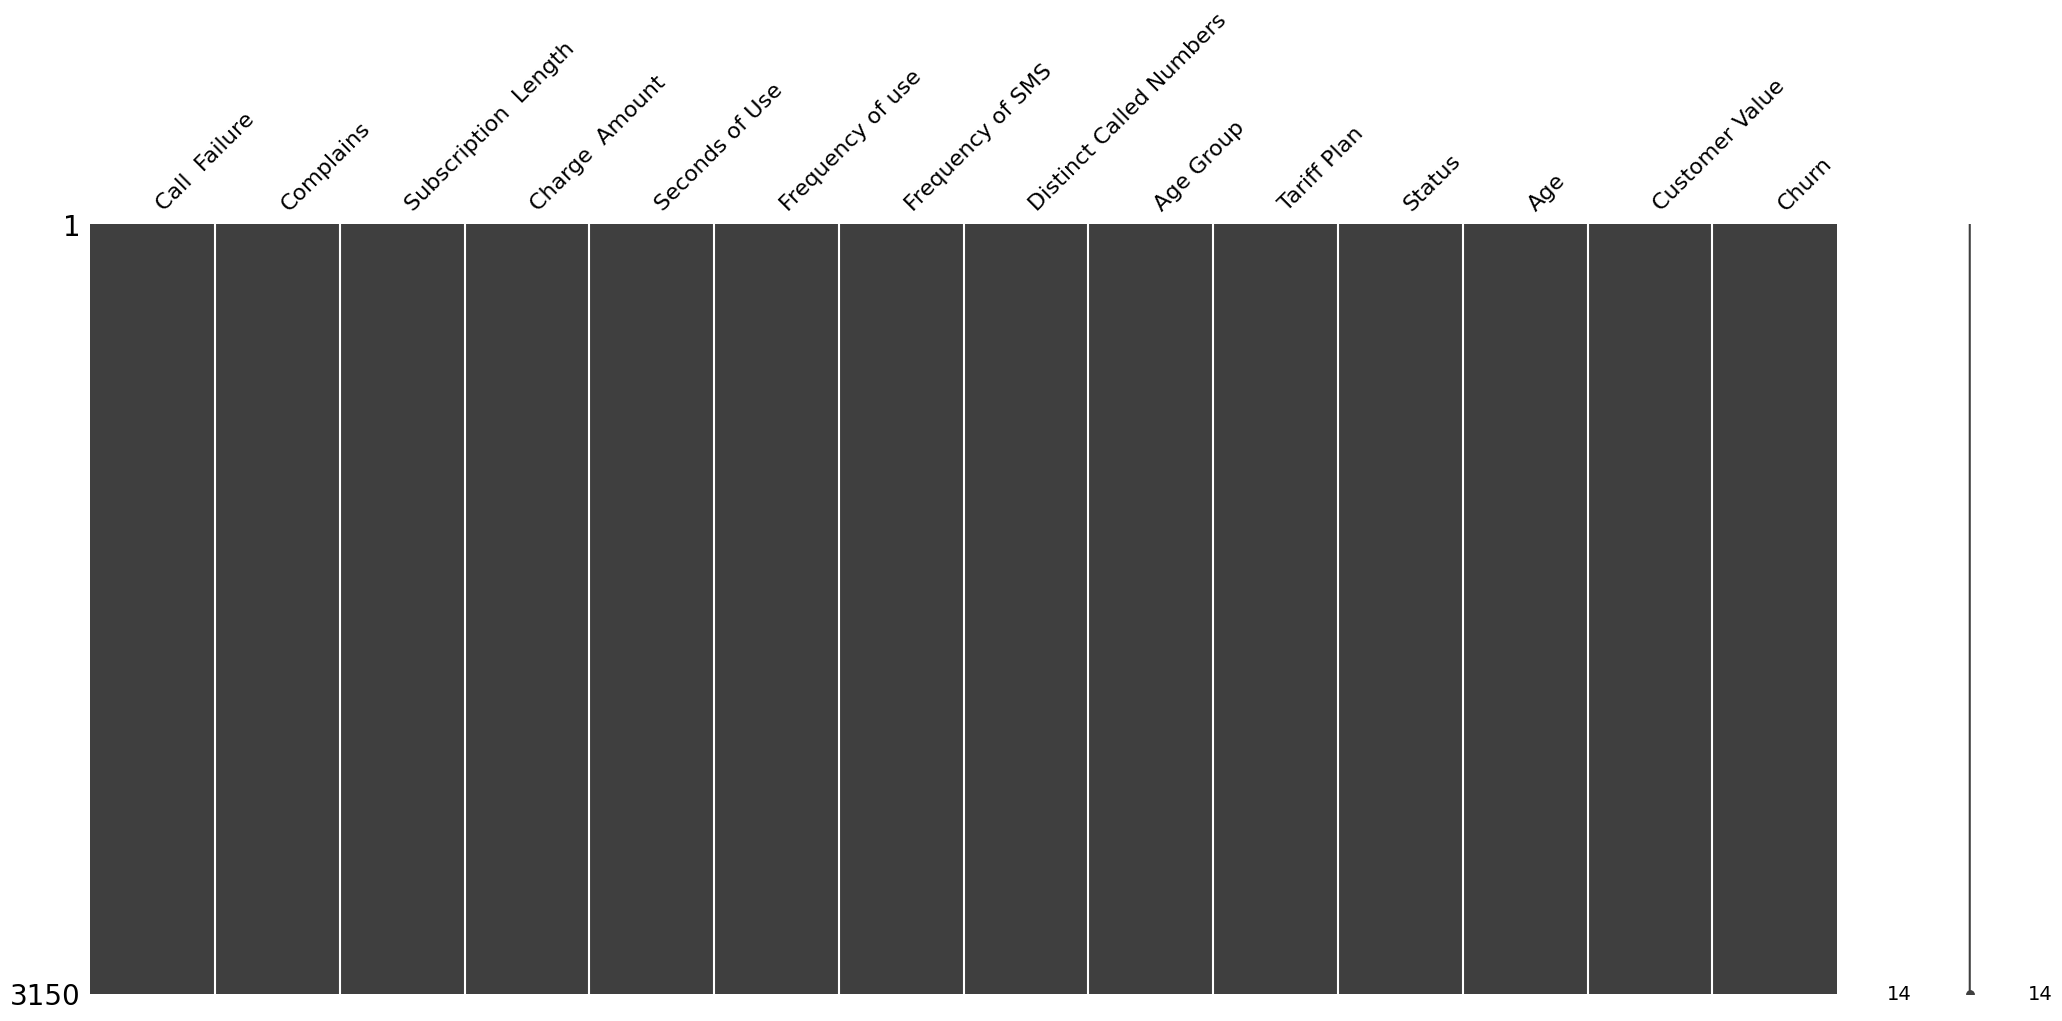

In [ ]:
import missingno as msno
msno.matrix(df)


- **Outliers**: Detect and treat outliers that may skew the results.
 - I want to check the outliers because they can dramatically affect the mean of my data, leading to misleading averages. This is particularly crucial in tasks like churn prediction, where understanding the typical customer behavior is key, and outliers might represent rare or exceptional cases.

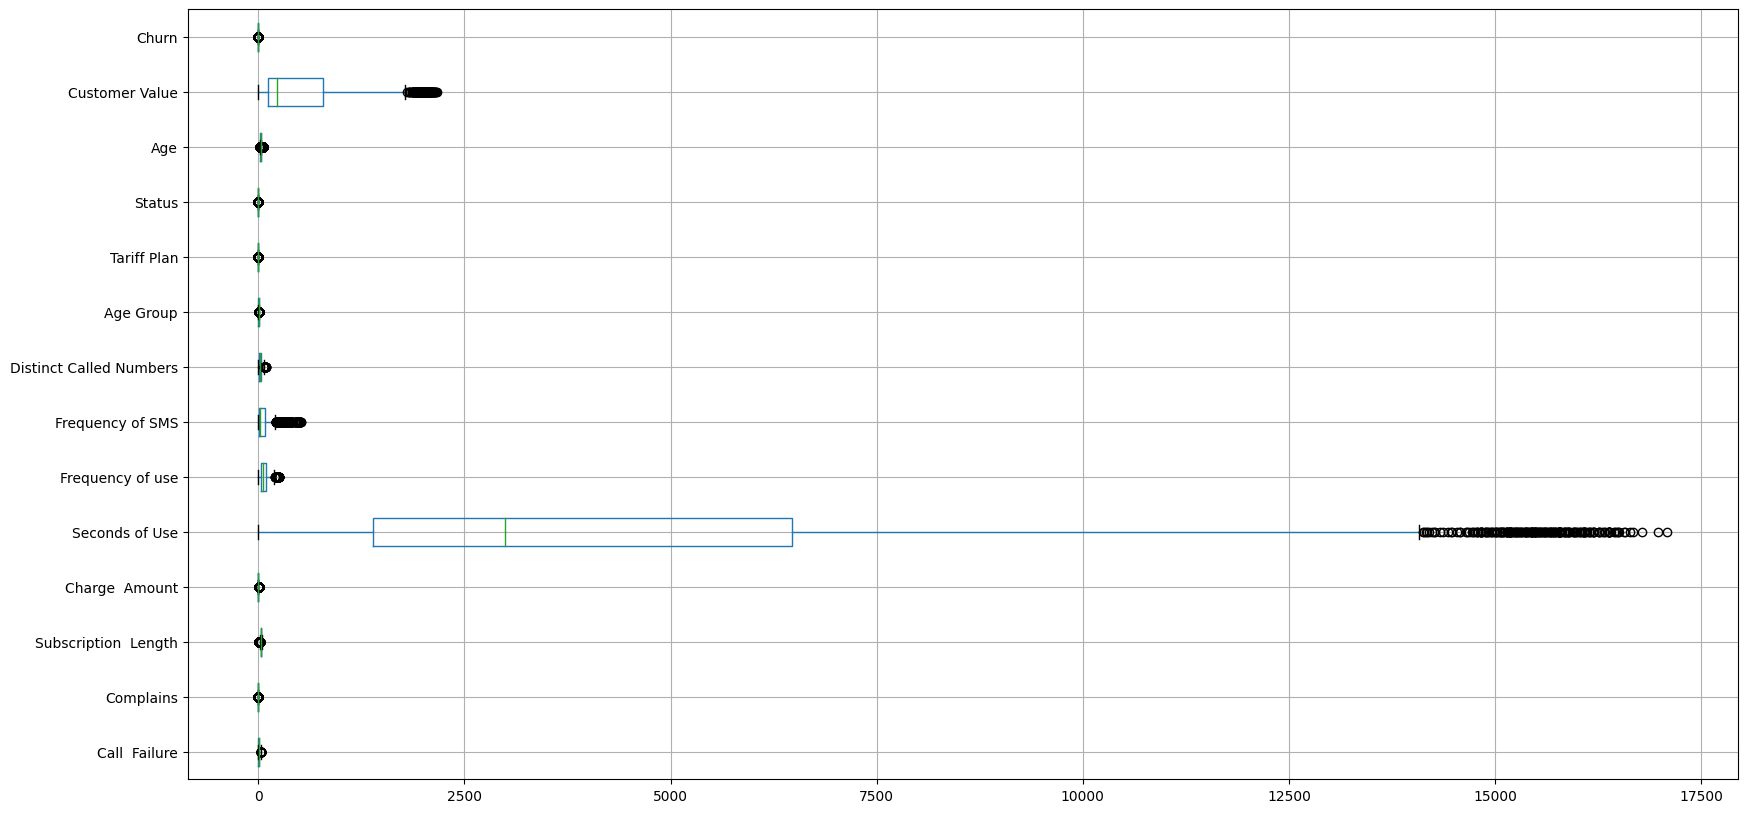

In [ ]:
# Set the size of the plot
plt.figure(figsize=(20, 10))  # Adjust the size as per your requirement

# Create a horizontal box plot for all features
df.boxplot(vert=False)

# Display the plot
plt.show()

We can see that the scales are vastly different, the box plots is not very informative for comparison purposes. In such cases, I will have to normalize or scale my data before plotting.

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalization
scaler = MinMaxScaler()

# Just change the value to min and max on each rows

ftData = scaler.fit(df_copy)
ftData2 = ftData.transform(df_copy)

df_norm = pd.DataFrame(ftData2,columns = df_copy.columns)
df_norm.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,0.222222,0.0,0.795455,0.0,0.255705,0.278431,0.009579,0.175258,0.50,0.0,0.0,0.375,0.091277,0.0
1,0.000000,0.0,0.818182,0.0,0.018607,0.019608,0.013410,0.041237,0.25,0.0,1.0,0.250,0.021261,0.0
2,0.277778,0.0,0.772727,0.0,0.143534,0.235294,0.687739,0.247423,0.50,0.0,0.0,0.375,0.709617,0.0
3,0.277778,0.0,0.795455,0.0,0.245641,0.258824,0.001916,0.360825,0.00,0.0,0.0,0.000,0.110849,0.0
4,0.083333,0.0,0.795455,0.0,0.140023,0.227451,0.003831,0.340206,0.00,0.0,0.0,0.000,0.067338,0.0


In [ ]:
df_norm.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,0.211887,0.076508,0.671407,0.094286,0.261700,0.272395,0.140182,0.242369,0.456508,0.077778,0.248254,0.399960,0.217511,0.157143
std,0.201775,0.265851,0.194852,0.152107,0.245635,0.225150,0.215014,0.177498,0.223139,0.267864,0.432069,0.220777,0.238775,0.363993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027778,0.000000,0.613636,0.000000,0.081407,0.105882,0.011494,0.103093,0.250000,0.000000,0.000000,0.250000,0.052557,0.000000
50%,0.166667,0.000000,0.727273,0.000000,0.174956,0.211765,0.040230,0.216495,0.500000,0.000000,0.000000,0.375000,0.105520,0.000000
75%,0.333333,0.000000,0.795455,0.100000,0.379067,0.372549,0.166667,0.350515,0.500000,0.000000,0.000000,0.375000,0.364105,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


When conducting a statistical analysis, it is observable that independent variables with a high average often also possess a high standard deviation, indicating significant dispersion from the mean. Conversely, this trend is often mirrored in variables with lower averages. Additionally, a substantial gap between the minimum and maximum values is frequently noted.

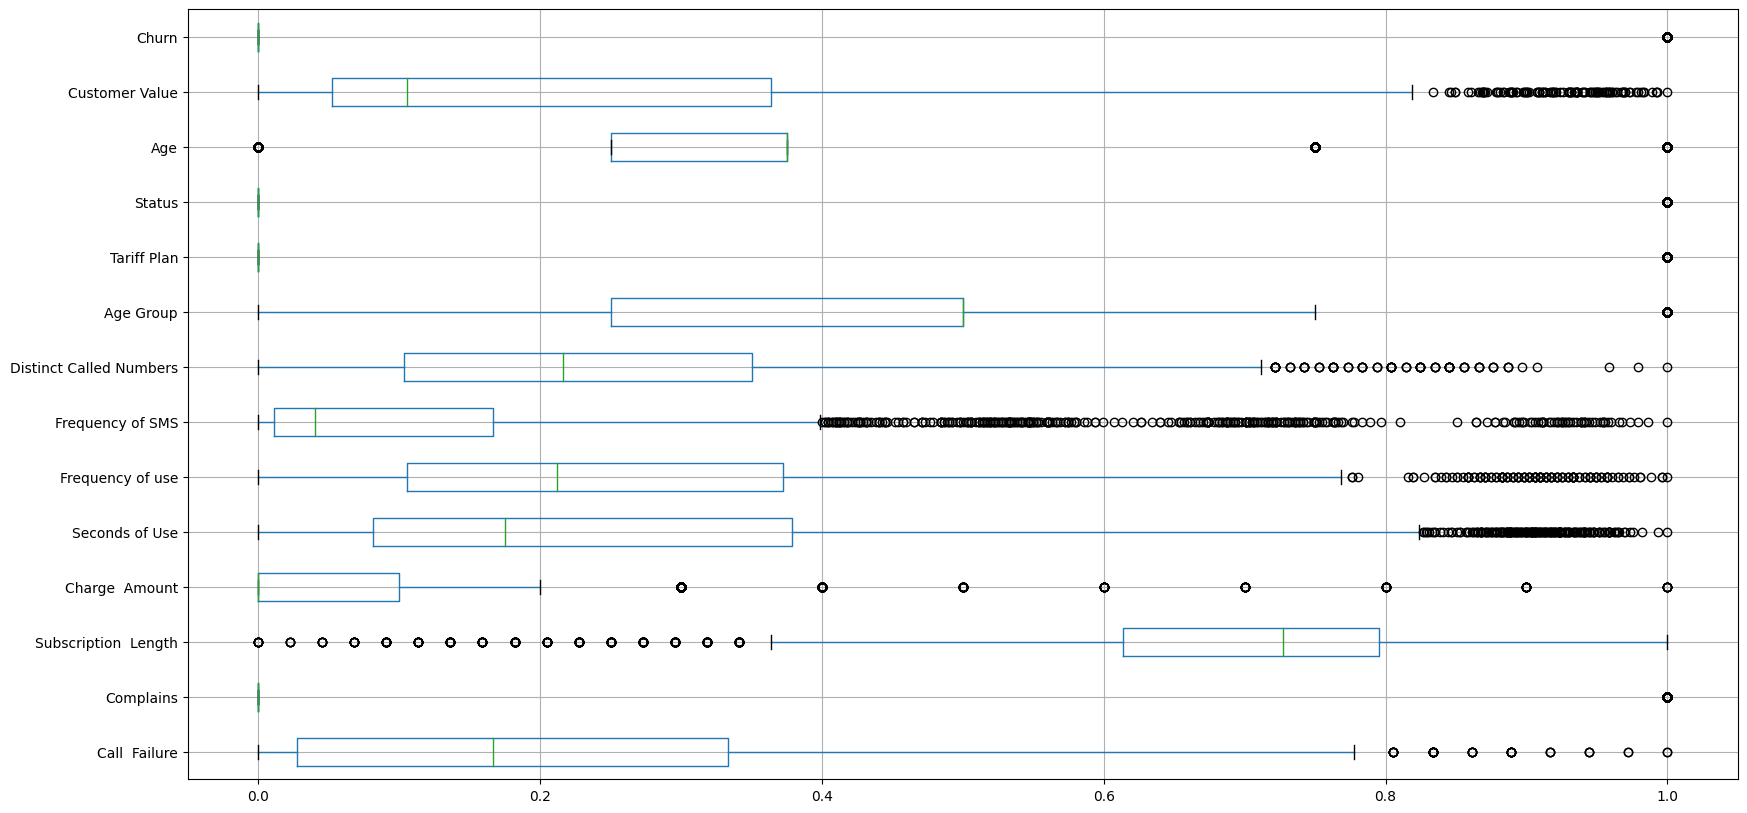

In [ ]:

# Set the size of the plot
plt.figure(figsize=(20, 10))  # Adjust the size as per your requirement

# Create a horizontal box plot for all features
df_norm.boxplot(vert=False)

# Display the plot
plt.show()

Base on this visualization it became evident that variables such as "Customer Value," "Subscription Length," and "Charge Amount" exhibit a substantial number of outliers this might degrade my logistic model's.

Furthermore, the "Distinct Called Numbers" and "Seconds of Use" variables demonstrated an expansive interquartile range (IQR). This wide span of the middle 50% of values points to a greater degree of variability within the dataset, signaling that these variables have a diverse set of observations.



### Derive new relevant feature for prediction

- This feature will provide insights into the average length of calls made by each customer

In [ ]:

df['Average Call Duration'] = df['Seconds of Use']/df['Frequency of SMS']

- This metric helps understand the frequency of call failures in relation to total calls made

In [ ]:
df['call_Failure_Rate'] = df['Call  Failure']/df['Frequency of use']

- This ratio indicate customer preference for communication methods.

In [ ]:
df['SMS to Call Ratio'] = df['Frequency of SMS']/df['Frequency of use']

- Measures the frequency of complaints over the duration of the subscription.

In [ ]:
df['Complaint Rate'] = df['Complains']/df['Subscription  Length']

In [ ]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Average Call Duration,call_Failure_Rate,SMS to Call Ratio,Complaint Rate
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,874.000000,0.112676,0.070423,0.0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,45.428571,0.000000,1.400000,0.0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,6.832869,0.166667,5.983333,0.0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,4198.000000,0.151515,0.015152,0.0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,1196.500000,0.051724,0.034483,0.0


In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn', 'Average Call Duration', 'call_Failure_Rate',
       'SMS to Call Ratio', 'Complaint Rate'],
      dtype='object')

### 3. Exploratory Data Analysis:


In [ ]:
df_copy = df.copy()
df_copy.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn', 'Average Call Duration', 'call_Failure_Rate',
       'SMS to Call Ratio', 'Complaint Rate'],
      dtype='object')

1. **How does customer value correlate with churn?**  
   Investigate whether higher customer value is associated with a lower likelihood of churn. This analysis could reveal if more valuable customers are more loyal or if they have different expectations leading to churn.

I think segmenting 'Customer Value' into categories like high, medium, and low is an effective way to analyze churn rates within these segments.

### Build Logistic Model

In [ ]:
# Using quantiles for segmentation
value_bins = df_copy['Customer Value'].quantile([0, 0.33, 0.66, 1]).tolist()  # Adjust the quantiles as needed
labels = ['Low', 'Medium', 'High']
df_copy['Value Segment'] = pd.cut(df_copy['Customer Value'], bins=value_bins, labels=labels, include_lowest=True)

In [ ]:
df_copy['Value Segment'].cat.categories

Index(['Low', 'Medium', 'High'], dtype='object')

In [ ]:
copy_cat = pd.get_dummies(df_copy, columns=['Value Segment'],drop_first=True)


In [ ]:
dependent = copy_cat['Churn']

In [ ]:
independents = copy_cat.drop('Churn', axis=1)

In [ ]:
independents.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Average Call Duration,call_Failure_Rate,SMS to Call Ratio,Complaint Rate,Value Segment_Medium,Value Segment_High
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,874.000000,0.112676,0.070423,0.0,1,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,45.428571,0.000000,1.400000,0.0,0,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,6.832869,0.166667,5.983333,0.0,0,1
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,4198.000000,0.151515,0.015152,0.0,1,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,1196.500000,0.051724,0.034483,0.0,0,0


In [ ]:
independents.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Average Call Duration', 'call_Failure_Rate',
       'SMS to Call Ratio', 'Complaint Rate', 'Value Segment_Medium',
       'Value Segment_High'],
      dtype='object')

In [ ]:
independents.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Average Call Duration      float64
call_Failure_Rate          float64
SMS to Call Ratio          float64
Complaint Rate             float64
Value Segment_Medium         uint8
Value Segment_High           uint8
dtype: object

In [ ]:
independent = independents[['Value Segment_Medium','Value Segment_High','Customer Value']]

In [ ]:
independent.head()

,Value Segment_Medium,Value Segment_High,Customer Value
0,1,0,197.640
1,0,0,46.035
2,0,1,1536.520
3,1,0,240.020
4,0,0,145.805


In [ ]:
independent.isna().sum()

Value Segment_Medium    0
Value Segment_High      0
Customer Value          0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Just change the value to min and max on each rows

temp = scaler.fit(independent)
temp2 = temp.transform(independent)

inde_norm = pd.DataFrame(temp2,columns = independent.columns)
inde_norm.head()

,Value Segment_Medium,Value Segment_High,Customer Value
0,1.0,0.0,0.091277
1,0.0,0.0,0.021261
2,0.0,1.0,0.709617
3,1.0,0.0,0.110849
4,0.0,0.0,0.067338


In [ ]:
dependent.dtypes

dtype('int64')

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [ ]:
# Fit the model
first_lr = logreg.fit(inde_norm, dependent)


In [ ]:
first_predY = first_lr.predict(inde_norm)

## Let's evaluate the model. It's classification, so we want to use accuracy as our metric.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
first_log_acc = accuracy_score(dependent,first_predY)
first_log_per = first_log_acc * 100
print('The accuracy of LogReg is {:.2f}%'.format(first_log_per))

The accuracy of LogReg is 84.29%


Our model demonstrates an accuracy of 84 percent. However, for comparison in classification tasks, we need to benchmark it against a simple model, such as the dummy classifier that predicts the most frequent class.

In [ ]:
from sklearn.dummy import DummyClassifier

zr = DummyClassifier()
zeroR = zr.fit(inde_norm,dependent)
zr_predY = zeroR.predict(inde_norm)

zr_acc = accuracy_score(dependent,zr_predY)
zr_per = zr_acc * 100
print('The accuracy of ZR is {:.2f}%'.format(zr_per))

The accuracy of ZR is 84.29%


In [ ]:
#NJW
dependent.value_counts()

0    2655
1     495
Name: Churn, dtype: int64

While my model did not surpass the performance of the Dummy Classifier, this outcome is not ideal. The objective is always to achieve superior performance with our classifier, reinforcing the accuracy of our data. However, it's noteworthy that our model's accuracy is not lower than the Dummy Classifier, which is a positive aspect. To further enhance this results, we'll attempt removing 'Customer Value' from our features. This variable was previously used for customer segmentation, and its inclusion might be contributing to a reduction in accuracy.

In [ ]:
sec_ind_norm = inde_norm.drop('Customer Value', axis=1)

In [ ]:
sec_lr = logreg.fit(sec_ind_norm, dependent)

In [ ]:
sec_predY = first_lr.predict(sec_ind_norm)

In [ ]:
first_log_acc = accuracy_score(dependent,first_predY)
first_log_per = first_log_acc * 100
print('The accuracy of LogReg is {:.2f}%'.format(first_log_per))

The accuracy of LogReg is 84.29%


In [ ]:

zr = DummyClassifier()
zeroR = zr.fit(inde_norm,dependent)
zr_predY = zeroR.predict(inde_norm)

zr_acc = accuracy_score(dependent,zr_predY)
zr_per = zr_acc * 100
print('The accuracy of ZR is {:.2f}%'.format(zr_per))

The accuracy of ZR is 84.29%


This indicates that customers with a low value have an 84 percent likelihood of churning from the company, and conversely, customers with a high value are less likely to leave.

I will do cross validation to see if there will be any changes on the result.

In [ ]:
from sklearn.model_selection import cross_val_score

zr_cv_results = cross_val_score(zeroR ,inde_norm , dependent, cv=10, scoring='accuracy')
lr_cv_results = cross_val_score(first_lr ,inde_norm , dependent, cv=10, scoring='accuracy')
print('The average emse is for zeroR  : {:.2f}'.format(abs((zr_cv_results.mean()))))
print('The average emse is for linear regression: {:.2f}'.format(abs((lr_cv_results.mean()))))

The average emse is for zeroR  : 0.84
The average emse is for linear regression: 0.84


Even after performing cross-validation, the results for both models remain consistent. This observation suggests that our model is not exhibiting signs of overfitting or underfitting, indicating a balanced and robust performance.

2. **What is the relationship between subscription length and churn?**  
   Examine if longer subscription lengths are indicative of lower churn rates. This can help in understanding if tenure is a significant factor in customer loyalty.


In [ ]:
independents.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Average Call Duration', 'call_Failure_Rate',
       'SMS to Call Ratio', 'Complaint Rate', 'Value Segment_Medium',
       'Value Segment_High'],
      dtype='object')

We will include several features that is relevant to the subscription lenght such as seconds of use, frequency of use and frequency of sms, as customers can only use this features only if the subscription is active.

In [ ]:
secind = independents[['Subscription  Length','Seconds of Use','Frequency of use','Frequency of SMS']]

In [ ]:
temsec = scaler.fit(secind)
temp2 = temp.transform(secind)

third_norm = pd.DataFrame(temp2,columns = secind.columns)
third_norm.head()

,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS
0,0.795455,0.255705,0.278431,0.009579
1,0.818182,0.018607,0.019608,0.013410
2,0.772727,0.143534,0.235294,0.687739
3,0.795455,0.245641,0.258824,0.001916
4,0.795455,0.140023,0.227451,0.003831


In [ ]:
th_lr = logreg.fit(third_norm, dependent)
th_predY = first_lr.predict(third_norm)
th_log_acc = accuracy_score(dependent,th_predY)

th_log_per = th_log_acc * 100
thzr = DummyClassifier()

thzeroR = zr.fit(third_norm,dependent)
thzr_predY = zeroR.predict(third_norm)

thzr_acc = accuracy_score(dependent,thzr_predY)
thzr_per = zr_acc * 100

print('The accuracy of ZR is {:.2f}%'.format(thzr_per))
print('The accuracy of LogReg is {:.2f}%'.format(th_log_per))

The accuracy of ZR is 84.29%
The accuracy of LogReg is 84.29%


In this scenario, we obtained a similar result where the model did not outperform the regressor. Consequently, we can infer that customer decisions—whether to leave or stay—are strongly influenced, to the extent of 84 percent, by their subscription length. To investigate further, I will assess the impact of dropping one of the three features and observe if it produces any significant changes

In [ ]:
newindep = secind.drop('Seconds of Use', axis = 1)

In [ ]:
newth_lr = logreg.fit(newindep, dependent)
newth_predY = first_lr.predict(newindep)
newth_log_acc = accuracy_score(dependent,newth_predY)

newth_log_per = newth_log_acc * 100
thzr = DummyClassifier()

newthzeroR = zr.fit(newindep,dependent)
newthzr_predY = newthzeroR.predict(newindep)

newthzr_acc = accuracy_score(dependent,newthzr_predY)
newthzr_per = zr_acc * 100

print('The accuracy of ZR is {:.2f}%'.format(newthzr_per))
print('The accuracy of LogReg is {:.2f}%'.format(newth_log_per))

The accuracy of ZR is 84.29%
The accuracy of LogReg is 84.29%


The result continue to be the same which is not what I was expecting when dropping one feature.

Lets do a cross validation on the model that include all the subscription lenght to see if the result will continue to be the same as our fist model.

In [ ]:
thzr_cv_results = cross_val_score(thzeroR, third_norm, dependent, cv=10, scoring='accuracy')
thlr_cv_results = cross_val_score(th_lr,third_norm,dependent, cv=10, scoring='accuracy')
print('The average emse is for zeroR  : {:.2f}'.format(abs((thzr_cv_results.mean()))))
print('The average emse is for linear regression: {:.2f}'.format(abs((thlr_cv_results.mean()))))

The average emse is for zeroR  : 0.84
The average emse is for linear regression: 0.84


Something is kinda weird with this data because the model is generating the same accuracy percenatages base on different feature and the same average of the cross validation compare to the previous model.

**Does the frequency of service usage (calls, SMS) impact churn rates?**  
   Analyze how the frequency of calls and SMS correlates with churn. This could indicate whether higher or lower usage of services influences the decision to stay with or leave the service provider.

In [ ]:
newindep.columns

Index(['Subscription  Length', 'Frequency of use', 'Frequency of SMS'], dtype='object')

In [ ]:
tqind = newindep.drop('Subscription  Length',axis=1)

In [ ]:
tqind.head()

,Frequency of use,Frequency of SMS
0,71,5
1,5,7
2,60,359
3,66,1
4,58,2


In [ ]:
tq_lr = logreg.fit(tqind, dependent)
tq_predY = first_lr.predict(tqind)
tq_log_acc = accuracy_score(dependent,tq_predY)

tq_log_per = tq_log_acc * 100
tqzr = DummyClassifier()

tqzeroR = zr.fit(tqind,dependent)
tqzr_predY = tqzeroR.predict(tqind)

tqzr_acc = accuracy_score(dependent,tqzr_predY)
tqzr_per = tqzr_acc * 100

print('The accuracy of ZR is {:.2f}%'.format(tqzr_per))
print('The accuracy of lr is {:.2f}%'.format(tq_log_per ))

The accuracy of ZR is 84.29%
The accuracy of lr is 84.29%


This implies an 84 percent accuracy in predicting customer churn based on the frequency of use. In other words, the frequency of use serves as an indicator, suggesting that customers have an 84 percent likelihood of leaving, and conversely, a corresponding probability of staying. Such a substantial influence underscores the significant impact of frequency of use on customer loyalty.

Lets do cross validation to see if our resuld will be diffrent compare to the other models.

In [ ]:
SEFEFEFe


In [ ]:
lr_cv_results = cross_val_score(tq_lr,tqind,dependent,cv=10, scoring='neg_root_mean_squared_error' )
zr_cv_results = cross_val_score(tqzeroR,tqind,dependent,cv=10, scoring='neg_root_mean_squared_error' )

print('The average emse is for lr : {:.2f}'.format(abs((lr_cv_results.mean()))))
print('The average emse is for zr : {:.2f}'.format(abs((zr_cv_results.mean()))))


The average emse is for lr : 0.40
The average emse is for zr : 0.40


This brings a sense of optimism. While the average cross-validation results for 'Now' differ from others, it's noteworthy that the cross-validation scores for 'ZR' and 'LR' remain consistent. This alignment raises questions about the overall accuracy of our model, as the similar cross-validation scores for both 'ZR' and 'LR' do not provide a clear distinction in performance.

4. **Are there differences in churn rates among different age groups and tariff plans?**  
   The goal is to see if certain age groups or users of specific tariff plans are more prone to churn. This might help in tailoring services to reduce churn in specific demographic segments.

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn', 'Average Call Duration', 'call_Failure_Rate',
       'SMS to Call Ratio', 'Complaint Rate'],
      dtype='object')

- I will first start examining the distribution of the 'Churn' variable and explore the relationships between 'Churn', 'Age Group', and 'Tariff Plan'.

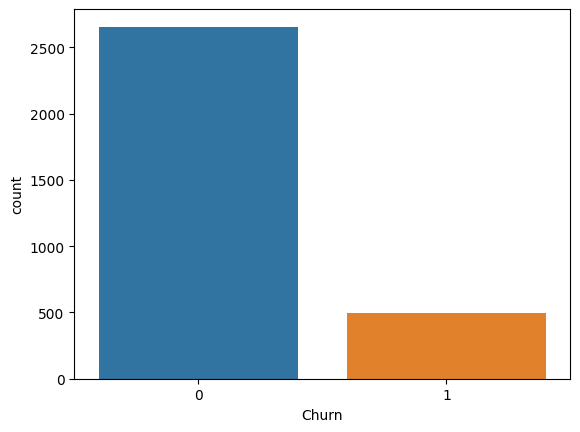

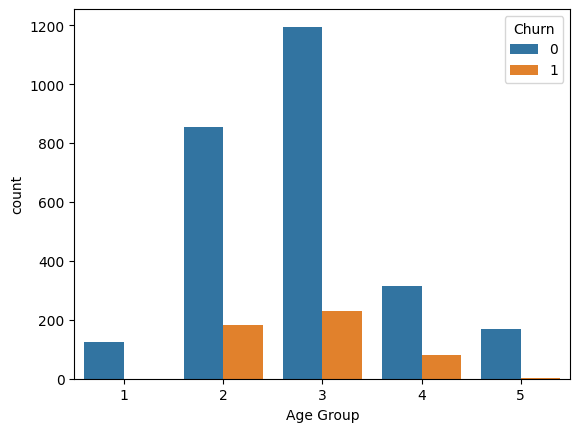

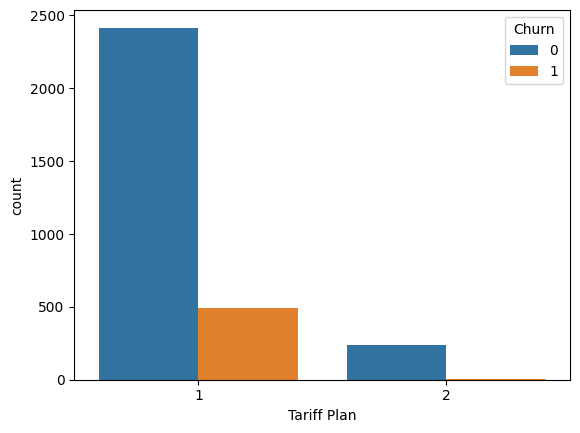

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.show()

# Explore the relationship between 'Churn', 'Age Group', and 'Tariff Plan'
sns.countplot(x='Age Group', hue='Churn', data=df)
plt.show()

sns.countplot(x='Tariff Plan', hue='Churn', data=df)
plt.show()


Observing the graphs, it becomes apparent that both young and old individuals exhibit lower likelihoods of leaving. Additionally, the 'Pay-as-you-go' tariff demonstrates a higher churn rate compared to contracted tariffs. Now, let's explore how these observations relate to customer churn in general.

In [ ]:
# One-hot encode categorical variables
independents = pd.get_dummies(independents, columns=['Age Group', 'Tariff Plan'], drop_first=True)
independents.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Age,...,call_Failure_Rate,SMS to Call Ratio,Complaint Rate,Value Segment_Medium,Value Segment_High,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Tariff Plan_2
0,8,0,38,0,4370,71,5,17,1,30,...,0.112676,0.070423,0.0,1,0,0,1,0,0,0
1,0,0,39,0,318,5,7,4,2,25,...,0.000000,1.400000,0.0,0,0,1,0,0,0,0
2,10,0,37,0,2453,60,359,24,1,30,...,0.166667,5.983333,0.0,0,1,0,1,0,0,0
3,10,0,38,0,4198,66,1,35,1,15,...,0.151515,0.015152,0.0,1,0,0,0,0,0,0
4,3,0,38,0,2393,58,2,33,1,15,...,0.051724,0.034483,0.0,0,0,0,0,0,0,0


In [ ]:
independents.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Status', 'Age', 'Customer Value',
       'Average Call Duration', 'call_Failure_Rate', 'SMS to Call Ratio',
       'Complaint Rate', 'Value Segment_Medium', 'Value Segment_High',
       'Age Group_2', 'Age Group_3', 'Age Group_4', 'Age Group_5',
       'Tariff Plan_2'],
      dtype='object')

In [ ]:
forthx = independents[['Age Group_2','Age Group_3','Age Group_4','Age Group_5','Tariff Plan_2']]

In [ ]:
fourthlogreg = logreg.fit(forthx,dependent)
fourthlogReg_predY = fourthlogreg.predict(forthx )
fourthlogReg_acc = accuracy_score(dependent,fourthlogReg_predY) * 100

fourthzr =  DummyClassifier(strategy="most_frequent")
fourthzeroR = zr.fit(forthx,dependent)
fourthzr_predY = zeroR.predict(forthx)
fourthzr_acc = accuracy_score(dependent,zr_predY) * 100

print("Accuracy. of the LogReg is {:.2f} %".format(fourthlogReg_acc))
print("Accuracy of the LogReg is {:.2f} %".format(fourthzr_acc))


Accuracy. of the LogReg is 84.29 %
Accuracy of the LogReg is 84.29 %


This model indicates an 84 percent accuracy in predicting the likelihood of customers leaving the company, considering the two features: age and tariff. Given the substantial percentage, it suggests that companies should delve into various age groups and customer segments to enhance their appeal. Now, let's examine the cross-validation results to further assess the model's reliability.

In [ ]:
fourthdt_cv_results = cross_val_score(fourthlogreg,forthx, dependent, cv=10, scoring='accuracy')
fourthdt_cv_results = cross_val_score(fourthzeroR, forthx, dependent, cv=10, scoring='accuracy')

print('The average cv for lr : {:.2f} %'.format(abs((fourthdt_cv_results.mean()))))
print('The average cv for zr : {:.2f} %'.format(abs((fourthdt_cv_results.mean()))))


The average cv for lr : 0.84
The average cv for zr : 0.84


Once again, the cross-validation results are consistent, indicating a lack of both overfitting and underfitting in our model. This stability suggests that our model's performance is robust and reliably captures patterns in the data without being excessively influenced by noise.

 **How do call failures and complaints relate to churn?**  
   Study the impact of call failures and the presence of complaints on the likelihood of churn. This could reveal the importance of service quality in customer retention strategies.


In [ ]:
lastind = independents[['Call  Failure','Complains']]

In [ ]:
temp = scaler.fit(lastind)
temp2 = temp.transform(lastind)

lastind_x = pd.DataFrame(temp2,columns = lastind .columns)
lastind_x.head()

,Call Failure,Complains
0,0.222222,0.0
1,0.000000,0.0
2,0.277778,0.0
3,0.277778,0.0
4,0.083333,0.0


In [ ]:
lastlogreg = logreg.fit(lastind_x,dependent)

In [ ]:
lastlogReg_predY = lastlogreg.predict(lastind_x)

In [ ]:
lastlogReg_acc = accuracy_score(dependent,lastlogReg_predY) * 100

In [ ]:
print("Accuracy. of the LogReg is {:.2f} %".format(lastlogReg_acc))

Accuracy. of the LogReg is 89.33 %


Our accuracy is looking pretty high lets compare to a classifier

In [ ]:
lastzr =  DummyClassifier(strategy="most_frequent")
zeroR = zr.fit(lastind_x,dependent)
zr_predY = zeroR.predict(lastind_x)

zr_acc = accuracy_score(dependent,zr_predY) * 100

In [ ]:
print("Accuracy of the LogReg is {:.2f} %".format(zr_acc))

Accuracy of the LogReg is 84.29 %


Our model indicates a substantial impact on customer churn when there is a high percentage of complaints and call failures, reaching 89 percent. Such a high percentage suggests a significant likelihood of customers leaving under these circumstances. To further validate the model's performance, I will conduct a cross-validation analysis to assess whether it is prone to overfitting or underfitting.

In [ ]:
lastdt_cv_results = cross_val_score(lastlogreg, lastind_x, dependent, cv=10, scoring='accuracy')
lastdt_cv_results = cross_val_score(zeroR, lastind_x, dependent, cv=10, scoring='accuracy')

print('The average cv for lr : {:.2f}'.format(abs((lastdt_cv_results.mean()))))
print('The average cv for zr : {:.2f}'.format(abs((lastdt_cv_results.mean()))))


The average cv for lr : 0.84
The average cv for zr : 0.84


This mean that on average both model perform the same

###**Conclusion**

The results obtained through logistic regression analysis offer valuable insights for a telecom company, providing actionable information to enhance customer retention strategies.

1. **Customer Value and Churn:**
   - The analysis indicates a significant correlation between customer value and churn. Higher customer value is associated with a lower likelihood of churn. This insight suggests that the company should focus on strategies to enhance the value proposition for customers, ensuring that they perceive greater value in the services offered.

2. **Subscription Length and Churn:**
   - The investigation into the relationship between subscription length and churn reveals insights into customer loyalty. If longer subscription lengths are indeed associated with lower churn rates, the company can consider implementing initiatives to encourage and reward customer loyalty over time. This might involve introducing long-term subscription benefits or personalized retention offers.

3. **Frequency of Service Usage and Churn:**
   - Analyzing the impact of service usage frequency on churn provides guidance on customer behavior. Understanding how call and SMS frequency correlates with churn allows the company to tailor its services or marketing efforts to specific usage patterns. For instance, incentivizing higher service usage among at-risk customer segments could be a targeted strategy.

4. **Age Groups and Tariff Plans:**
   - The identification of differences in churn rates among age groups and tariff plans allows for more targeted customer segmentation. The company can customize its communication and engagement strategies based on the preferences and behaviors of specific age demographics and tariff plan users. This personalization can contribute to increased customer satisfaction and loyalty.

5. **Call Failures and Complaints:**
   - The study on the impact of call failures and complaints on churn emphasizes the critical role of service quality. Addressing issues related to call failures and promptly resolving customer complaints can significantly improve customer satisfaction and reduce the likelihood of churn. Implementing proactive measures to enhance service quality is paramount for long-term customer retention.

**Overall Recommendations:**
   - **Personalized Customer Engagement:** Tailor communication and marketing strategies based on customer segments identified through age groups and tariff plans, emphasizing the unique preferences and needs of each group.
   - **Service Quality Improvement:** Prioritize initiatives to address and mitigate call failures and customer complaints to enhance overall service quality and customer satisfaction.
   - **Long-Term Loyalty Programs:** Introduce and promote loyalty programs or incentives for customers with longer subscription lengths, encouraging sustained engagement and reducing churn.
   - **Data-Driven Decision-Making:** Continuously analyze customer data and behavior to adapt strategies dynamically, ensuring ongoing relevance and effectiveness in customer retention efforts.

By implementing these recommendations, the telecom company stands to improve customer satisfaction, loyalty, and overall business performance, ultimately contributing to a more competitive and sustainable market position.

### What I would like to explore further

I aim to conduct a tree graph analysis to visually assess whether the results of each regression might exhibit variations under a different analytical approach. This graphical representation can provide a nuanced understanding of how the decision boundaries are formed within the dataset and may offer insights distinct from those derived from logistic regression.

Additionally, I plan to delve into the interrelationships between features by constructing a heatmap. This heatmap will showcase the correlation between different features and various independent variables. By exploring these interconnected relationships, I intend to gain a more comprehensive understanding of how the combined effects of these features influence customer churn. This multifaceted analysis will contribute to a deeper insight into the intricate dynamics among the variables, potentially uncovering patterns or dependencies that might not be as evident in a single-variable regression analysis.